# Directed Percolation
Author: Michelle Contreras Cossio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Implementation of the Directed Percolation
1. Implement a two dimensional directed percolation model in Python. The naive solution simulates water pouring into the top row, and then iterate over rows and sites. Think of a faster way of solving this problem. If you want to try implementing your solution, you will need to add an additional private method _flow_recursive(i, j) that contains the recursive logic

In [68]:
class PercolationSimulation:
    """
    A simulation of a 2D directed percolation problem. Given a 2D lattice, blocked sites
    are denoted by 0s, and open sites are denoted by 1s. During a simulation, water is
    poured into the top of the grid, and allowed to percolate to the bottom. If water
    fills a lattice site, it is marked with a 2 in the grid. Water only reaches a site
    if it reaches an open site directly above, or to the immediate left or right 
    of an open site.

    I've included the API for my solution below. You can use this as a starting point, 
    or you can re-factor the code to your own style. Your final solution must have a 
    method called percolate that creates a random lattice and runs a percolation 
    simulation and
    1. returns True if the system percolates
    2. stores the original lattice in self.grid
    3. stores the water filled lattice in self.grid_filled

    + For simplicity, use the first dimension of the array as the percolation direction
    + For boundary conditions, assume that any site out of bounds is a 0 (blocked)
    + You should use numpy for this problem, although it is possible to use lists 



    Attributes:
        grid (np.array): the original lattice of blocked (0) and open (1) sites
        grid_filled (np.array): the lattice after water has been poured in
        n (int): number of rows and columns in the lattice
        p (float): probability of a site being blocked in the randomly-sampled lattice
            random_state (int): random seed for the random number generator
        random_state (int): random seed for numpy's random number generator. Used to 
            ensure reproducibility across random simulations. The default value of None
            will use the current state of the random number generator without resetting
            it.
    """

    def __init__(self, n=100, p=0.5, grid=None, random_state=None):
        """
        Initialize a PercolationSimulation object.

        Args:
            n (int): number of rows and columns in the lattice
            p (float): probability of a site being blocked in the randomly-sampled lattice
            random_state (int): random seed for numpy's random number generator. Used to
                ensure reproducibility across random simulations. The default value of None
                will use the current state of the random number generator without resetting
                it.
        """

        self.random_state = random_state # the random seed
        np.random.seed(random_state)

        # Initialize a random grid if one is not provided. Otherwise, use the provided
        # grid.
        if grid is None:
            self.n = n
            self.p = p
            self.grid = np.zeros((n, n))
            self._initialize_grid()
        else:
            assert len(np.unique(np.ravel(grid))) <= 2, "Grid must only contain 0s and 1s"
            self.grid = grid.astype(int)
            # override numbers if grid is provided
            self.n = grid.shape[0]
            self.p = 1 - np.mean(grid)
            self.grid_ini = np.copy(self.grid)

        # The filled grid used in the percolation calculation. Initialize to the original
        # grid. We technically don't need to copy the original grid if we want to save
        # memory, but it makes the code easier to debug if this is a separate variable 
        # from self.grid.
        self.grid_filled = np.copy(self.grid)

    def _initialize_grid(self):
        """
        Sample a random lattice for the percolation simulation. This method should
        write new values to the self.grid and self.grid_filled attributes. Make sure
        to set the random seed inside this method.

        This is a helper function for the percolation algorithm, and so we denote it 
        with an underscore in order to indicate that it is not a public method (it is 
        used internally by the class, but end users should not call it). In other 
        languages like Java, private methods are not accessible outside the class, but
        in Python, they are accessible but external usage is discouraged by convention.

        Private methods are useful for functions that are necessary to support the 
        public methods (here, our percolate() method), but which we expect we might need
        to alter in the future. If we released our code as a library, others might 
        build software that accesses percolate(), and so we should not alter the 
        input/outputs because it's a public method
        """
        # 1: blocked/filled, 0: empty , 
        # UPDATE: to be consistent with the test code: 0 = blocked, 1 = empty, 2 = filled
        self.grid = np.random.choice([0, 1], size=(self.n, self.n), p = [self.p, 1-self.p]) 
        self.grid_ini = np.copy(self.grid)


    def _flow_recursive(self, i, j):
        """
        Only used if we opt for a recursive solution.

        The recursive portion of the flow simulation. Notice how grid and grid_filled
        are used to keep track of the global state, even as our recursive calls nest
        deeper and deeper
        """

        # Skip if we are out of the boundaries 
        if (i < 0 or i > self.n-1 or j < 0 or j > self.n-1):
            return None
        # Skip if the place is blocked or full 
        elif (self.grid[i, j] == 0 or self.grid[i, j] == 2):
            return None
        # Fill the spot if is not empty, and try for the 4 neighbors 
        else: 
            self.grid[i, j] = 2
            self._flow_recursive(i + 1, j)
            self._flow_recursive(i - 1, j)
            self._flow_recursive(i, j + 1)
            self._flow_recursive(i, j - 1)   


    def _flow(self):
        """
        Run a percolation simulation using recursion

        This method writes to the grid and grid_filled attributes, but it does not
        return anything. In other languages like Java or C, this method would return
        void
        """
        # Loop over ONLY the first row, if it percolates, it will reach the bottom on its own
        for j in range(self.n):
            self._flow_recursive(0, j)
    
    def  _check_difference(self, bottom_initial, bottom_final):
        """Check the total number of different sites between the bottom of the two grids
        to estimate the number of sites that percolated"""
        return np.abs(np.sum(bottom_initial != bottom_final))

    def percolate(self):
        """
        Initialize a random lattice and then run a percolation simulation. Report results
        """

        # Start the flow of water 
        self._flow()

        # Check if there was a difference between the initial and final bottom row of the grid
        n_percolated = self._check_difference(self.grid[-1], self.grid_ini[-1])

        if n_percolated != 0: is_percolated = True
        else: is_percolated = False 

        return is_percolated

### Test (MICHELLE'S CODE)

2. Perform replicate simulations using the code I've provided below, and create a plot showing how the probability of percolation changes as a function of N (the lattice size). Beyond seeing the predictable percolation to clogging transition, you'll notice that the variance in the outcome of your simulations behaves unexpectedly. What is going on here? (Hint: If you've studied the Ising model, you've seen something like this before)

As in the Ising model (for a magnet for example), the magnetization depents on the temperature. In this case, the probability of percolation depends on the parameter $p$ that we give to the method, which represents the probability of a site being blocked. For the Ising model, there's a threshold where if the Temperature is too high, the magnetization quickly drops, due to a phase transition (the system goes from being a ferromagnet to a paramagnet). Something analogous should happen to this process, where it undergoes a "phase transition", from being a "free" system to a "blocked" system, that doesn't allows percolation

True
False


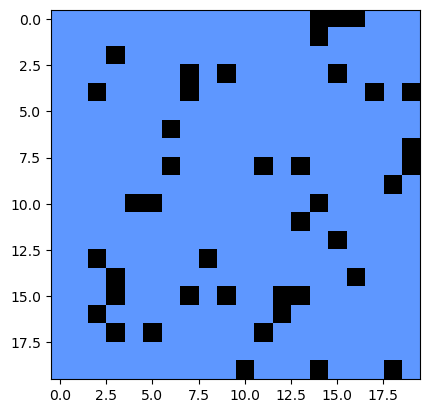

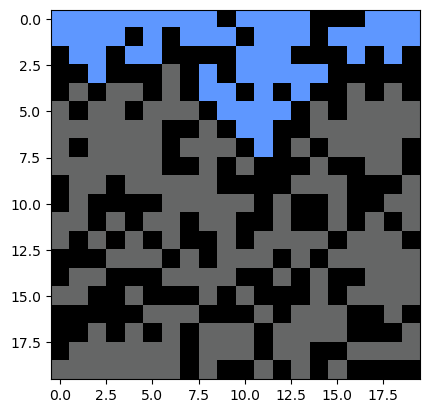

In [69]:
# Import William's solution
#from solutions.percolation import PercolationSimulation

from matplotlib.colors import LinearSegmentedColormap
def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)


model = PercolationSimulation(n=20, random_state=0, p=0.1)
print(model.percolate())
plt.figure()
plot_percolation(model.grid)

model = PercolationSimulation(n=20, random_state=0, p=0.4)
print(model.percolate())
plt.figure()
plot_percolation(model.grid)


# model = PercolationSimulation(n=20, random_state=0, p=0.9)
# print(model.percolate())
# plt.figure()
# plot_percolation(model.grid_filled)

## Probability of Percolation as a function of N

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

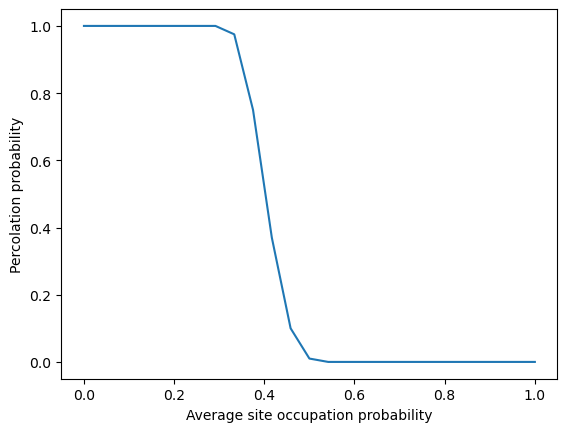

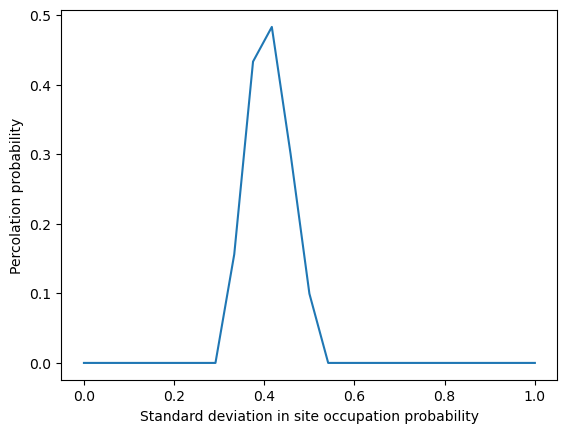

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


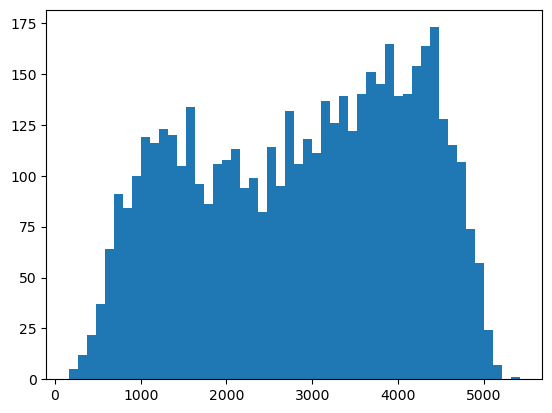

In [70]:

# Import William's solution
#from solutions.percolation import PercolationSimulation

pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = PercolationSimulation(30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()


## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = PercolationSimulation(100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.grid == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50);


3. Theoretically, does the transition point seen in our empirical results align with your intuition? Can you make a simple statistical argument for the percolation threshold? (Hint: think about counting occupied sites versus counting links between sites).

Yes, my intuition says that if the probability is greater than 0.5, then it's pretty difficult that the system percolates, because most sites are blocked.


4. How does the memory usage and runtime of your percolation model implement scale with the lattice size? You can answer this empirically or theoretically.

It's < $N_{grid}$, probably also containing a factor ~ $p$ , because we are starting with looping to through the first row, and then only looking at the adjacent sites which are not blocked or outside the boundaries.

### Video of sweep of $p$ 
5. One way to sweep the control parameter $p$ would be to start in a limit where most of the sites are blocked, and then gradually open up individual sites one at a time until the lattice percolates. A video of a simulation where the lattice is gradually opened can be seen [here](https://vimeo.com/747772333). How do the different events in the gradually unblocked percolation simulation relate to the two timescales we saw in the sandpile problem?

We can relate both problems as (seeing the simulation), the grain we drop in the sandpile problem being the blue sites, and when we open sites (decrease the probability of occupation), these blue sites increment, giving the avalanche. So one loop over $p$, as in the video, represents one avalanche. 


In [71]:
initial_lattice = np.zeros((50, 50))

# Decide the order in which sites become blocked
np.random.seed(0)
all_lattice_indices = np.array(
    [(i, j) for i in range(initial_lattice.shape[0]) for j in range(initial_lattice.shape[1])]
)
np.random.shuffle(all_lattice_indices)

# does percolate 
all_grids = list()
for inds in all_lattice_indices:
    
    initial_lattice[inds[0], inds[1]] = 1
    model = PercolationSimulation(grid=initial_lattice)
    model.percolate()

    if (model.p > 0.3) and (model.p < 0.7):
        all_grids.append(np.copy(model.grid))


In [72]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    fig = plt.figure(figsize=(10, 10))
    plot_percolation(all_grids[i])
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(all_grids) - 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=999), Output()), _…

<function __main__.plotter(i)>

### Test (WILLIAM'S CODE)

True
True


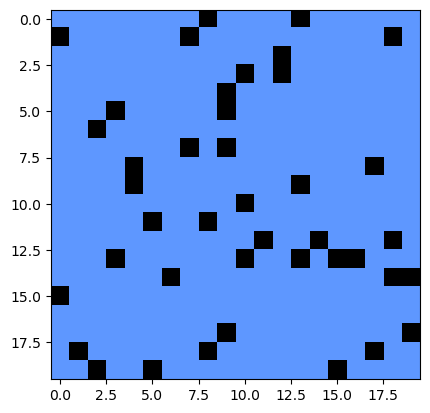

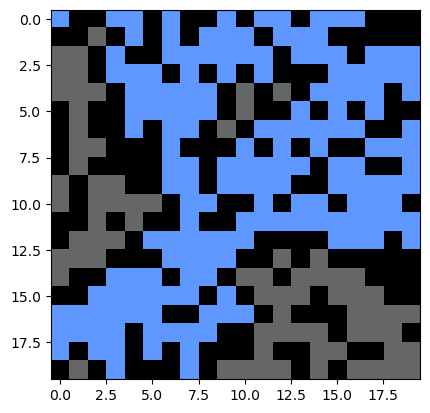

In [55]:
# Import William's solution
import sys
sys.path.append("../..")
from cphy.hw.solutions.percolation import PercolationSimulation as PS

from matplotlib.colors import LinearSegmentedColormap
def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)


model = PS(n=20, random_state=0, p=0.1)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)

model = PS(n=20, random_state=0, p=0.4)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)


# model = PercolationSimulation(n=20, random_state=0, p=0.9)
# print(model.percolate())
# plt.figure()
# plot_percolation(model.grid_filled)

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

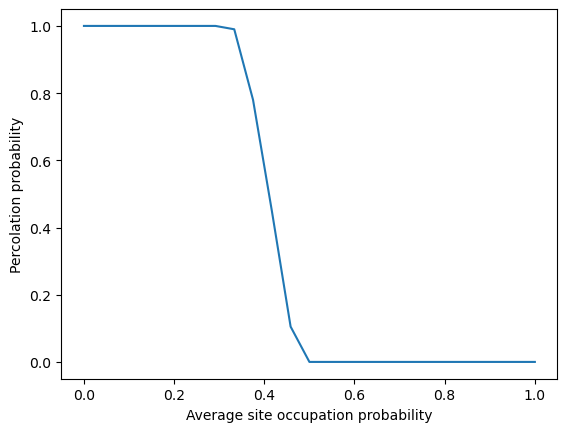

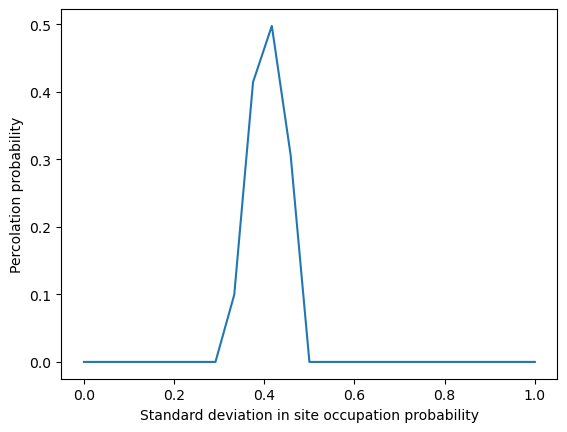

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


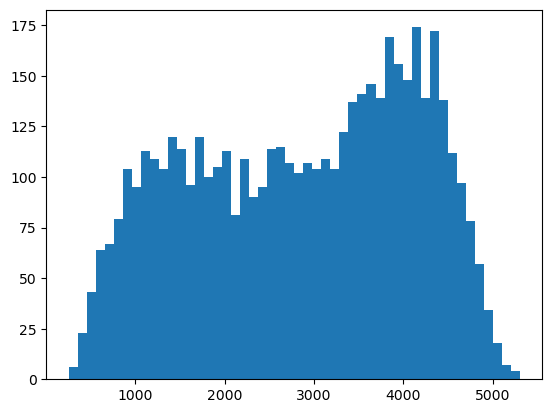

In [58]:

# Import William's solution
import sys
sys.path.append("../..")
from cphy.hw.solutions.percolation import PercolationSimulation as PS

pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = PS(30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()


## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = PS(100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.grid_filled == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50);
